In [1]:
# Loan Prediction

In [2]:
#import pyspark


In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from sklearn import datasets
import warnings

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
warnings.filterwarnings("ignore")

In [4]:
loan_train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
loan_test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
#combine = [train_df, test_df]

In [5]:
Loan_train_original=loan_train.copy()
Loan_test_original=loan_test.copy()

In [6]:
#loan_train.head()
#loan_train.tail()
#loan_test.head()
#loan_test.tail()

In [7]:
loan_train.shape


(614, 13)

In [8]:
loan_test.shape

(367, 12)

In [9]:
print(loan_train.columns.values)

['Loan_ID' 'Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History' 'Property_Area' 'Loan_Status']


In [10]:
print(loan_test.columns.values)

['Loan_ID' 'Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History' 'Property_Area']


In [11]:
loan_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [12]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [13]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [14]:
loan_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [15]:
loan_train.apply(lambda x: sum(x.isnull()), axis = 0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
loan_test.apply(lambda x: sum(x.isnull()), axis = 0) 

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [17]:
loan_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [18]:
loan_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [19]:
loan_test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [20]:
loan_test['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

Here are a few inferences, you can draw by looking at the output of describe() function:

1. LoanAmount has (614 – 592) 22 missing values.
2. Loan_Amount_Term has (614 – 600) 14 missing values.
3. Credit_History has (614 – 564) 50 missing values.
4. We can also look that about 84% applicants have a credit_history. How? 
5. The mean of Credit_History field is 0.84 (Remember, Credit_History has value 1 for those who have a credit history and 0 otherwise)
6. The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome.

Note that  that we can get an idea of a possible skew in the data by comparing the mean to the median, i.e. the 50% figure.

For the non-numerical values (e.g. Property_Area, Credit_History etc.), we can look at frequency distribution to understand whether they make sense or not. 
The frequency table can be printed by following command:

In [21]:
loan_train['Property_Area'].value_counts()
#loan_train['Education'].value_counts()
#loan_train['Marrie'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

 Plotting the histogram of ApplicantIncome using the following commands:

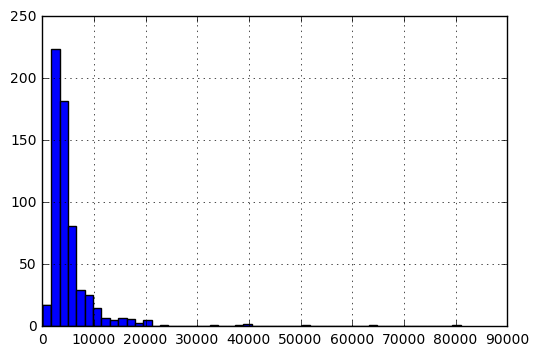

In [22]:
loan_train['ApplicantIncome'].hist(bins=50)
                                  
    

To understand the distributions better let us use box plot

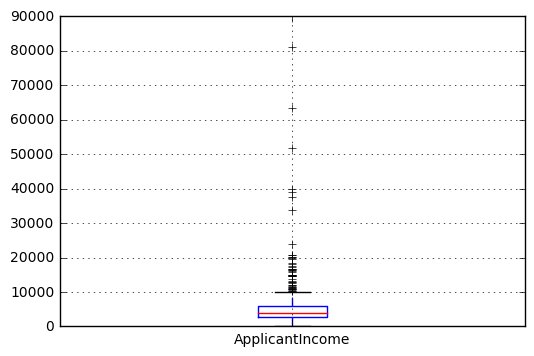

In [23]:
loan_train.boxplot(column= 'ApplicantIncome')

This confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

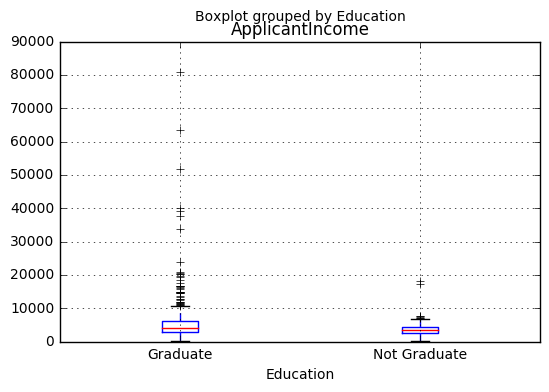

In [24]:
loan_train.boxplot(column= 'ApplicantIncome', by ='Education')

We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Now, Let’s look at the histogram and boxplot of LoanAmount using the following command:

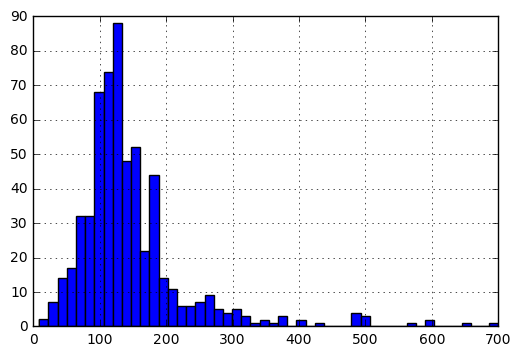

In [25]:
loan_train['LoanAmount'].hist(bins = 50)

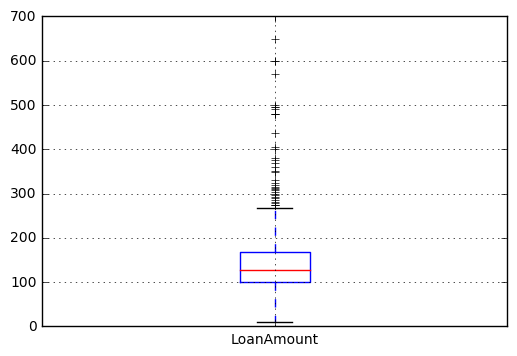

In [26]:
loan_train.boxplot(column = 'LoanAmount')

# Categorical variable analysis

Note: here loan status has been coded as 1 for Yes and 0 for No. So the mean represents the probability of getting loan.

Here are the problems, we are already aware of:

1. There are missing values in some variables. We should estimate those values wisely depending on the amount of missing values and the expected importance of variables.
2. While looking at the distributions, we saw that ApplicantIncome and LoanAmount seemed to contain extreme values at either end. Though they might make intuitive sense, but should be treated appropriately.

In addition to these problems with numerical fields, we should also look at the non-numerical fields i.e. Gender, Property_Area, Married, Education and Dependents to see, if they contain any useful information.

Let us check the number of nulls / NaNs in the dataset.


In [27]:
loan_train.apply(lambda x: sum(x.isnull()), axis = 0)  

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
#loan_test['Gender'].value_counts()

In [29]:
#loan_test['Gender'].value_counts()

# How to fill missing values in LoanAmount?
There are numerous ways to fill the missing values of loan amount – the simplest being replacement by mean, which can be done by following code:

In [30]:
loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(), inplace = True)

The other extreme could be to build a supervised learning model to predict loan amount on the basis of other variables
and then use age along with other variables to predict survival.

Since, the purpose now is to bring out the steps in data munging, I’ll rather take an approach, which lies some where
in between these 2 extremes. A key hypothesis is that the whether a person is educated or self-employed can combine 
to give a good estimate of loan amount.

First, let’s look at the boxplot to see if a trend exists:

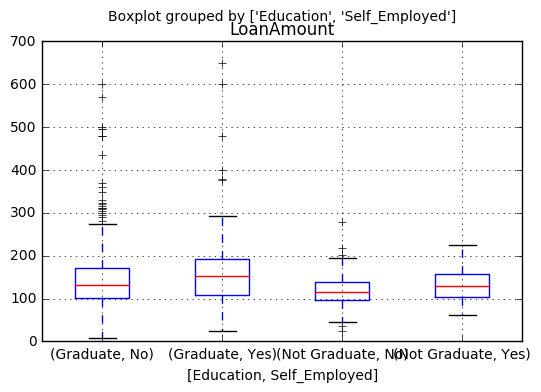

In [31]:
loan_train.boxplot(column ='LoanAmount', by = ['Education','Self_Employed'])

Thus we see some variations in the median of loan amount for each group and this can be used to impute the values.

But first, we have to ensure that each of Self_Employed and Education variables should not have a missing values.

In [32]:
loan_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Since ~86% values are “No”, it is safe to impute the missing values as “No” as there is a high probability of success. This can be done using the following code:

In [33]:
loan_train['Self_Employed'].fillna('No', inplace = True)

In [34]:
loan_train['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

Now, we will create a Pivot table, which provides us median values for all the groups of unique values of Self_Employed and Education features. Next, we define a function, which returns the values of these cells 
and apply it to fill the missing values of loan amount:

In [35]:
table = loan_train.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]
 #Replace missing values
#loan_train['LoanAmount'].fillna(loan_train[loan_train['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)


This should provide you a good way to impute missing values of loan amount.

NOTE : This method will work only if you have not filled the missing values in Loan_Amount variable using the previous approach, i.e. using mean.

# How to treat for extreme values in distribution of LoanAmount and ApplicantIncome?

Let’s analyze LoanAmount first. Since the extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect:

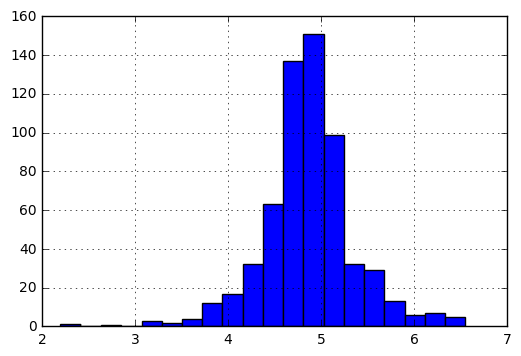

In [36]:
loan_train['LoanAmount_log'] = np.log(loan_train['LoanAmount'])
loan_train['LoanAmount_log'].hist(bins = 20)

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

Coming to ApplicantIncome. One intuition can be that some applicants have lower income but strong support Co-applicants. So it might be a good idea to combine both incomes as total income and take a log transformation of the same.

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

$TotalIncome$  - we combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

$EMI$  - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

$BalanceIncome$  - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

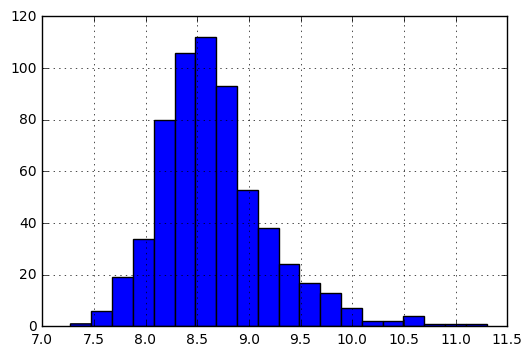

In [37]:
loan_train['TotalIncome'] = loan_train['ApplicantIncome'] +loan_train['CoapplicantIncome']
loan_train['TotalIncome_log'] = np.log(loan_train['TotalIncome'])
loan_train['TotalIncome_log'].hist(bins = 20)

In [38]:
#sns.distplot(loan_train['TotalIncome']);

In [39]:
loan_test['TotalIncome'] = loan_test['ApplicantIncome'] + loan_test['CoapplicantIncome']
loan_test['TotalIncome_log'] = np.log(loan_test['TotalIncome'])
#sns.distplot(loan_test['TotalIncome_log']); 

In [40]:
#Let’s create the EMI feature now.

#loan_train['EMI']=loan_train['LoanAmount']/loan_train['Loan_Amount_Term'] 
#loan_test['EMI']=loan_test['LoanAmount']/loan_test['Loan_Amount_Term']


In [41]:
#Let’s check the distribution of EMI variable.

#sns.distplot(loan_test['EMI']);

In [42]:
loan_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

About 80% of the population is male and  19% is female. The missing value is 13. We divide according to the ratio so 10 will be male and 3 will be female. ( I find out how to do this)



Impute the missing value as male. there is a high probablty of being correct.


In [43]:
loan_train['Gender'].fillna('Male', inplace = True)

In [44]:
loan_train['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [45]:
loan_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

There are only three missing values. So it may not hurt to make them married.

In [46]:
loan_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [47]:
loan_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [48]:
loan_train['Dependents'].fillna('0', inplace = True)

In [49]:
loan_train['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [50]:
loan_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [51]:
loan_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [52]:
loan_train['Credit_History'].fillna(1, inplace = True)

In [53]:
loan_train['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [54]:
loan_train.apply(lambda x: sum(x.isnull()), axis = 0) 

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [55]:
#loan_train=loan_train.drop('Loan_ID',axis=1)
#loan_test=loan_test.drop('Loan_ID',axis=1)

#  Building a Predictive Model in Python
After, we have made the data useful for modeling, let’s now look at the python code to create a predictive 
model on our data set. Skicit-Learn (sklearn) is the most commonly used library in Python for this purpose 
and we will follow the trail. I encourage you to get a refresher on sklearn through this $article$.

Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories. Before that we will fill all the missing values in the dataset. This can be done using the following code:

Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables 
into numeric by encoding the categories. Before that we will fill all the missing values in the dataset. 
This can be done using the following code:

In [56]:
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mode()[0], inplace=True)
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0], inplace=True)

In [57]:
#Let’s create the EMI feature now.

loan_train['EMI']=loan_train['LoanAmount']/loan_train['Loan_Amount_Term'] 
#loan_test['EMI']=loan_test['LoanAmount']/loan_test['Loan_Amount_Term']

In [58]:
loan_train.apply(lambda x: sum(x.isnull()), axis = 0) 
#loan_train.drop('EMI', axis = 1);

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
EMI                  0
dtype: int64

In [59]:
loan_train.apply(lambda x: sum(x.isnull()), axis = 0) 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
EMI                  0
dtype: int64

In [60]:
#loan_train = loan_train.drop('EMI', axis = 1)

In [61]:
#sns.distplot(loan_test['EMI'])

In [62]:
#loan_test['Gender'].value_counts()

In [63]:
#loan_test['Self_Employed'].value_counts()

In [64]:
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)
loan_test['Self_Employed'].fillna(loan_test['Self_Employed'].mode()[0], inplace=True)
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].mode()[0], inplace=True)
loan_test['Loan_Amount_Term'].fillna(loan_test['Loan_Amount_Term'].mode()[0], inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode()[0], inplace=True)

In [65]:
loan_test['EMI']=loan_test['LoanAmount']/loan_test['Loan_Amount_Term']

In [66]:
#loan_test = loan_test.drop('EMI', axis = 1);

In [67]:
loan_test.apply(lambda x: sum(x.isnull()), axis = 0) 


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
TotalIncome          0
TotalIncome_log      0
EMI                  0
dtype: int64

In [68]:
 from sklearn.preprocessing import LabelEncoder
    
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    loan_train[i] = le.fit_transform(loan_train[i])
loan_train.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
EMI                  float64
dtype: object

"""
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()
for i in var_mod:
    loan_test[i] = le.fit_transform(loan_test[i])
loan_test.dtypes 
"""

In [69]:
loan_train['Loan_Status'] = loan_train.Loan_Status.astype(float)

In [70]:
loan_train['Loan_Status'].dtypes 

dtype('float64')

In [71]:
    
#loan_train.drop('Loan_ID')

In [72]:
# Import models from scikit learn module:
#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

# Logistic Regression
We can easily make some intuitive hypothesis to set the ball rolling. The chances of getting a loan will be higher for:

1. Applicants having a credit history (remember we observed this in exploration?)

2. Applicants with higher applicant and co-applicant incomes

3. Applicants with higher education level

4. Properties in urban areas with high growth perspectives

 So let’s make our first model with ‘Credit_History’.

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

In [73]:
#X = loan_train.drop('Loan_Status',1) 
#y = loan_train.Loan_Status

In [74]:
#filenames = ['X', 'loan_test']
dfff = pd.merge(loan_train, loan_test,  on='Credit_History', how='inner')

In [75]:
dfff.shape

(166951, 31)

In [76]:
X = dfff.drop('Loan_Status',1) 
y = dfff.Loan_Status

Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare.

In [95]:
X = pd.get_dummies(X) 
dfff=pd.get_dummies(dfff) 
#loan_test=pd.get_dummies(loan_test)

In [96]:
#X_test11  = loan_test1['Credit_History']

In [97]:
#X_test11.shape

Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(X, y, test_size =0.3)

In [99]:
#loan_test1.shape


In [100]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [101]:
pred_cv = model.predict(x_test)

In [103]:
accuracy_score(y_test,pred_cv)

0.7718124825300483

In [104]:
#y_cv.shape

In [105]:
#y_cv.shape

In [106]:

#x2 =loan_test.values.reshape(1, -1)
#x2 =loan_test1.values.reshape(-1, 1)

In [107]:
#print(loan_test.columns.values)

In [108]:
#pred_test = model.predict(x2)

In [109]:
from sklearn.model_selection import StratifiedKFold

In [110]:
# logistic regression
#StratifiedKFold
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(x_test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7718546913839058

2 of kfold 5
accuracy_score 0.7714054685394268

3 of kfold 5
accuracy_score 0.7722140696594891

4 of kfold 5
accuracy_score 0.7875048668723232

5 of kfold 5
accuracy_score 0.798316810925754


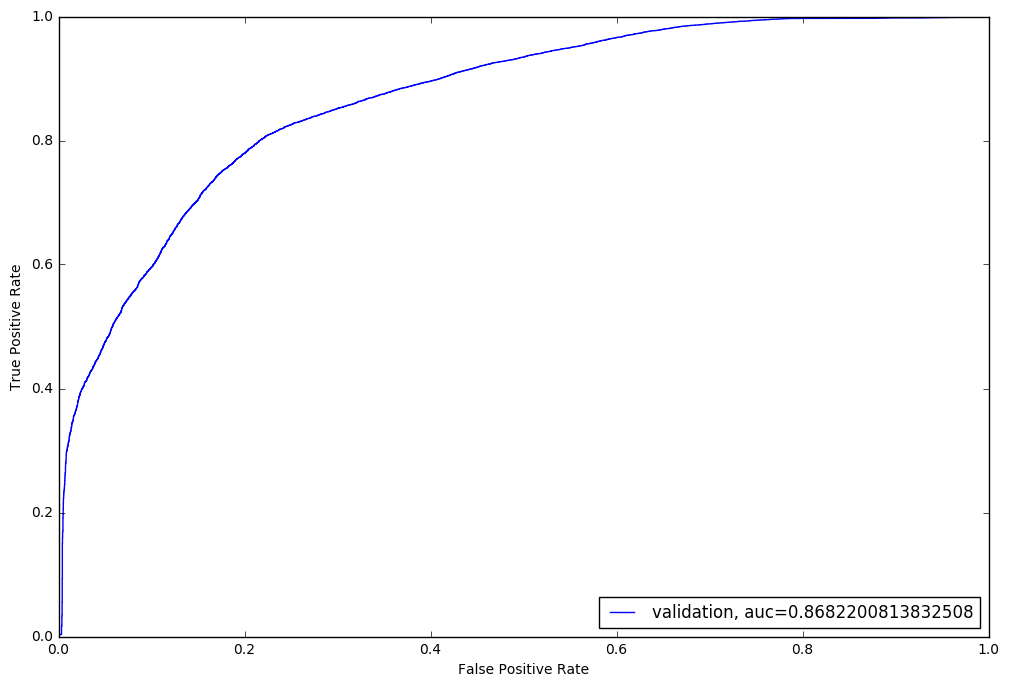

In [111]:
# ROC curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### Decision Tree

In [112]:
from sklearn import tree

Let's fit the decision tree model with 5 folds of cross validation.



In [113]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = tree.DecisionTreeClassifier(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(x_test)


1 of kfold 5
accuracy_score 1.0

2 of kfold 5
accuracy_score 1.0

3 of kfold 5
accuracy_score 1.0

4 of kfold 5
accuracy_score 1.0

5 of kfold 5
accuracy_score 1.0


In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [116]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=1)

In [ ]:
# Fit the grid search model
grid_search.fit(x_train,y_train)

In [ ]:
# Estimating the optimized value
grid_search.best_estimator_

In [ ]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(x_test)